# Problem Set 1

This is the first homework assignment, which accounts for $15\%$ of your final grade. There are six questions, and their weights are:
* Q1: $10\%$,
* Q2: $15\%$,
* Q3: $15\%$,
* Q4: $10\%$,
* Q5: $30\%$,
* Q6: $30\%$.

You may notice that the above weights sum up to $110\%$. In other words, even if you make some mistakes in some subquestions, you can still get $100\%$ (Even if you get all the questions right, the maximum score you can obtain is $100\%$).  

You may work with other students. The maximum number of students per group is two. However, you can work on your own. Be sure to indicate with whom you have worked in your submission.

### Deadline: October 4, 2022. 

---

## Q1. Cafe Menu ($10\%$)

Write a program that 
* first displays a simple cafe menu (see details below), 
* asks the user to enter the number of a choice, and 
* either prints the appropriate action OR prints an error message that their choice was not valid.


#### Example of printing the appropriate action:
 
Cafe Menu:
1. Expresso
2. Long Black
3. Cold Brew
4. Mocha
5. Latte
6. Cappuccino

Which number would you like to order?5

Thanks for ordering Latte.

----------
#### Example of printing an error message that their choice was not valid:
 
Cafe Menu:
1. Expresso
2. Long Black
3. Cold Brew
4. Mocha
5. Latte
6. Cappuccino

Which number would you like to order? 10

Sorry, that is not a valid choice.

In [1]:
def cafe_menu():
    cafe_list = ['Expresso', 'Long Black', 'Cold Brew', 'Mocha', 'Latte', 'Cappuccino']
    print('----------')
    print('Cafe Menu:')
    for ii in range(len(cafe_list)):
        cafe = cafe_list[ii]
        print(str(ii+1) + ". " + cafe)
    print('----------')
    cafe_customer = input("Which number would you like to order?")
    if int(cafe_customer) > 0 and int(cafe_customer) < (1+len(cafe_list)):
        print("Thanks for ordering", cafe_list[int(cafe_customer)-1]+".")
    else:
        print("Sorry, that is not a valid choice.")

In [2]:
cafe_menu()

----------
Cafe Menu:
1. Expresso
2. Long Black
3. Cold Brew
4. Mocha
5. Latte
6. Cappuccino
----------
Which number would you like to order?11
Sorry, that is not a valid choice.


In [3]:
cafe_menu()

----------
Cafe Menu:
1. Expresso
2. Long Black
3. Cold Brew
4. Mocha
5. Latte
6. Cappuccino
----------
Which number would you like to order?5
Thanks for ordering Latte.


---

## Q2. Approximating $\pi$ ($15\%$)

In this question, we aim to approximate $\pi$, which is around $3.141592653589793...$. 

Let's look at the below figure: The square target has a length of two cm and the circular target has a radius of one cm. Using high-school mathematics, we know that the ratio of the area of the circle to the area of the square is
$$
\frac{\text{area of circle}}{\text{area of square}} = \frac{\pi \times 1^2}{2^2} = \frac{\pi}{4}. 
$$

How do we use the above relationship to approximate $\pi$? We rely on the idea of Monte-Carlo simulations. Let's say we simulate data in the 2-D square, with some points $(x,y)$. $x$ and $y$ follows uniform distributions taking values in $[-1,+1]$. For every single point $(x,y)$, its probability of entering the circle is exactly $\frac{\pi}{4}$. When we repeat this experiment for many times (100,000), we can count the frequency of $(x,y)$ entering the circle, and this percentage should be close to $\frac{\pi}{4}$. 

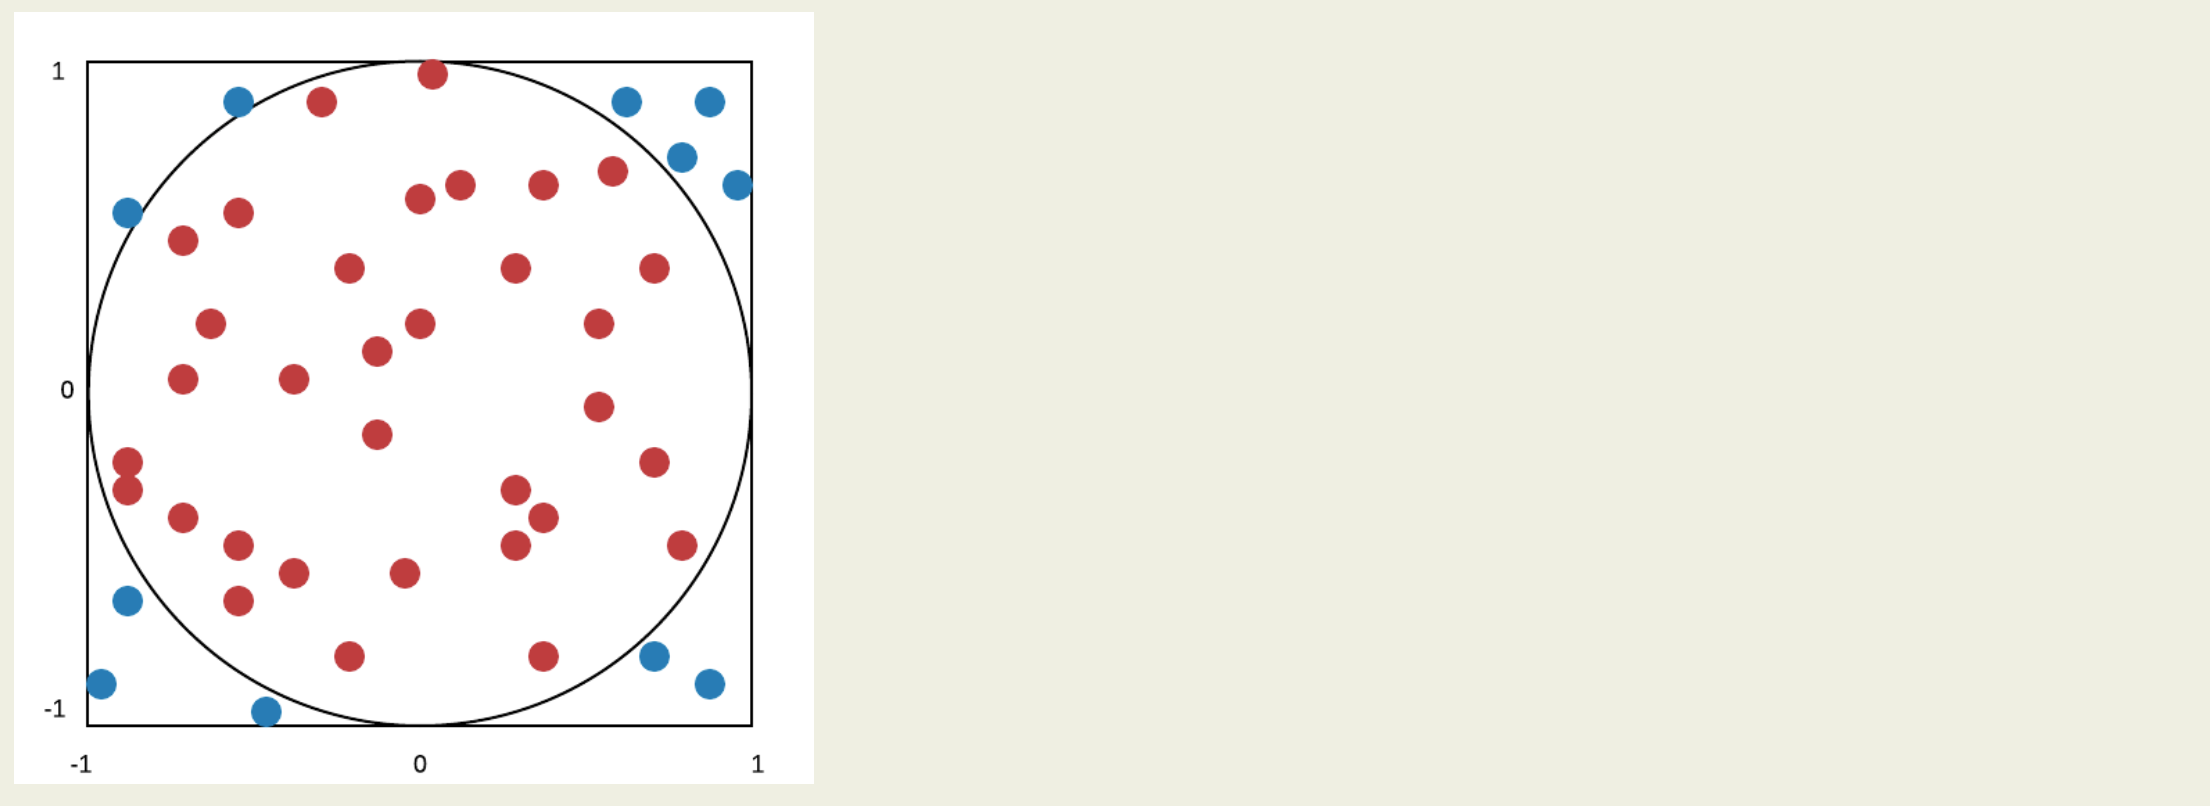


Motivated by the above argument, you are required to write a function to approximate $\pi$. Some hints:
* You need to use the built-in module ```random``` to simulate random numbers. For example, if you want to simulate a point from a uniform distribution $[-1,+1]$, you can do the following:
```python
import random   # first import the built-in module
x = random.uniform(-1,1)
y = random.uniform(-1,1)
```
* After you simulate ```x``` and ```y```, you need to determine whether the point $(x,y)$ enters the circle by checking ```x**2+y**2 <= 1```. 

Here is the specification of the funtion that you are asked to write:
```python
def approximate_pi(num_steps):
   """
   num_steps int, the number of steps in Monte-Carlo simultions;
   Return an approximation of pi using Monte-Carlo simultions.
   """ 
```

After you write down your codes, please try the following:
```python
import random
print("Approximated value of pi using 1000 Monte-Carlo simulations:", approximate_pi(1000))
print("Approximated value of pi using 10000 Monte-Carlo simulations:", approximate_pi(10000))
print("Approximated value of pi using 100000 Monte-Carlo simulations:", approximate_pi(100000))
import math
print("True value of pi given by Python", math.pi)
```

In [4]:
def approximate_pi(num_steps):
    
    num_steps_record = 0
    for n in range(num_steps):
        x = random.uniform(-1,1)
        y = random.uniform(-1,1)
        if (x**2+y**2 <= 1):
            num_steps_record = num_steps_record + 1
    return(4*num_steps_record/num_steps)


In [5]:
import random
print("Approximated value of pi using 1000 Monte-Carlo simulations:", approximate_pi(1000))
print("Approximated value of pi using 10000 Monte-Carlo simulations:", approximate_pi(10000))
print("Approximated value of pi using 100000 Monte-Carlo simulations:", approximate_pi(100000))
import math
print("True value of pi given by Python", math.pi)

Approximated value of pi using 1000 Monte-Carlo simulations: 3.152
Approximated value of pi using 10000 Monte-Carlo simulations: 3.1384
Approximated value of pi using 100000 Monte-Carlo simulations: 3.14304
True value of pi given by Python 3.141592653589793


---

## Q3. Permutations of a String Using Recursion ($15\%$)

This question comes from the course "*6.0001 Introduction to Computer Science and Programming in Python*" at MIT. 

A permutation is simply a name for a reordering. So the permutations of the string ‘abc’ are ‘abc’, ‘acb’, ‘bac’, ‘bca’, ‘cab’, and ‘cba’. Note that a sequence is a permutation of itself (the trivial permutation). You’ll need to write a **recursive** function ```get_permutations``` that takes a string and returns a list of all its permutations. 

Note: **Recursion MUST be used, global variables may NOT be used**. Additionally, it is okay to use loops to code the solution. The order of the returned permutations does not matter. Please also avoid returning duplicates in your final list.

#### Suggested Approach

In order to solve any recursive problem, we must have at least one base case and a recursive case (or cases). In this approach, our base case is if ```sequence``` is a single character (there’s only one way to order a single character). 

If ```sequence``` is longer than one character, we need to identify a simpler version of the problem that, if solved, will help us easily find all permutations for ```sequence```. The pseudocode is:
* Base case:
 * if ```sequence``` is a single character, there’s only one way to order it
   * return a singleton list containing ```sequence```
* Recursive case:
 * suppose we have a method that can give us a list of all permutations of **all but the first character** in ```sequence``` (Hint: think recursion), 
 * then the permutations of all characters in ```sequence``` would be the combination of the first character and a list of all permutations of the remaining strings. For example, 
   * if our word was ```'bust'```, we hold out the character ```'b'``` and get the list ```['ust', 'sut', 'stu', 'uts', 'tus', 'tsu']```, then we return ```['bust', 'bsut', 'bstu', 'buts', 'btus', 'btsu']```.

```python
def get_permutations(sequence):
    '''
    Enumerate all permutations of a given string

    sequence (string): an arbitrary string to permute. Assume that it is a non-empty string.  

    You MUST use recursion for this part. Non-recursive solutions will not be accepted.

    Returns: a list of all permutations of sequence

    Example:
    >>> get_permutations('abc')
    ['abc', 'acb', 'bac', 'bca', 'cab', 'cba']

    Note: depending on your implementation, you may return the permutations in
    a different order than what is listed here.
    '''

```

In [8]:
def combine_strings(char0, char_list):
    char_list = char_list[:]
    #print(char_list)
    #print('----------------------')
    for ii in range(len(char_list)):
        char_list[ii] = char0 + char_list[ii]
    #print(char_list)
    return char_list
    

In [9]:
def get_permutations(sequence):
    '''
    Enumerate all permutations of a given string

    sequence (string): an arbitrary string to permute. Assume that it is a non-empty string.  

    You MUST use recursion for this part. Non-recursive solutions will not be accepted.

    Returns: a list of all permutations of sequence

    Example:
    >>> get_permutations('abc')
    ['abc', 'acb', 'bac', 'bca', 'cab', 'cba']

    Note: depending on your implementation, you may return the permutations in
    a different order than what is listed here.
    '''
    
    def get_permutations_(sequence):
        if len(sequence) == 1:
            return([sequence])
        elif len(sequence) > 1:
            output_list = []
            for ii in range(len(sequence)):
                ss = sequence[ii]
                output_list = output_list + combine_strings(ss, get_permutations_(sequence[0:ii]+sequence[(ii+1):]))
            return output_list
    
    output_list = get_permutations_(sequence)
    output_list_unique = []
    for e in output_list:
        if e not in output_list_unique:
            output_list_unique.append(e)
    return(output_list_unique)
    #return(list(set(get_permutations_(sequence))))
    

In [10]:
print(len(get_permutations('bust')))
print(get_permutations('bust'))

24
['bust', 'buts', 'bsut', 'bstu', 'btus', 'btsu', 'ubst', 'ubts', 'usbt', 'ustb', 'utbs', 'utsb', 'sbut', 'sbtu', 'subt', 'sutb', 'stbu', 'stub', 'tbus', 'tbsu', 'tubs', 'tusb', 'tsbu', 'tsub']


In [11]:
print(len(get_permutations('abc')))
print(get_permutations('abc'))

6
['abc', 'acb', 'bac', 'bca', 'cab', 'cba']


In [12]:
print(len(get_permutations('uust')))
print(get_permutations('uust'))

12
['uust', 'uuts', 'usut', 'ustu', 'utus', 'utsu', 'suut', 'sutu', 'stuu', 'tuus', 'tusu', 'tsuu']


---

## Q4. Simple Exercise of ```dict``` ($10\%$)

Suppose that there are eight types of coffee (```cafe_list```), and we know their prices (```price_list```). 
```python
cafe_list = ['Expresso', 'Long Black', 'Cold Brew', 'Mocha', 'Latte', 'Cappuccino', 
             'Flat White', 'Dirty Original']
price_list = [30, 40, 38, 45, 42, 42, 42, 45]
```

Write a program that combines these lists into a dictionary, *where we require coffee prices to be the keys and coffee names to be the values (lists of coffee names)*. Then, write a function that, given the price, returns the names of all coffee types with the same price (or ```None``` if no coffee type has this price). For example, 
```python
print(coffee(42)) = ['Latte', 'Cappuccino', 'Flat White']
```

In [13]:
cafe_list = ['Expresso', 'Long Black', 'Cold Brew', 'Mocha', 'Latte', 'Cappuccino', 
             'Flat White', 'Dirty Original']
price_list = [30, 40, 38, 45, 42, 42, 42, 45]

price_to_cafe = {}

for i in range(len(cafe_list)):
    name = cafe_list[i]
    price = price_list[i]
    if price in price_to_cafe:
        price_to_cafe[price].append(name)
    else:
        price_to_cafe[price] = [name]


In [14]:
def coffee(price, price_to_cafe):
    
    if price in price_to_cafe:
        return price_to_cafe[price]
    else:
        return None
        

In [15]:
print(coffee(42, price_to_cafe))
print(coffee(30, price_to_cafe))
print(coffee(50, price_to_cafe))

['Latte', 'Cappuccino', 'Flat White']
['Expresso']
None


---

## Q5. Newton-Raphson Algorithm ($25\%$)

In week 1, we introduced the bisection search, which was used to find the square root of a positive real number. However, we have an even faster algorithm, called ***Newton-Raphson*** algorithm. It can be used to find the real roots of many differentiable functions. In this question, we explore how to use Newton-Raphson algorithm to find out the square root of a positive real number. 

Suppose that $f(x)$ is a scalar function that has real roots $x_0$, i.e., $f(x_0) = 0$. Examples of $f(x)$ include $f(x) = x^2 - 9$, $f(x) = 3 x^2 + 2x +3$, etc. The Taylor expansion implies that
$$
f(x_0) - f(x) \approx f'(x) (x_0 - x) \implies x_0 \approx x - \frac{f(x)}{f'(x)}, 
$$
where $f'(x)$ is the first-order derivative of $f(x)$, and we use the fact that $f(x_0) = 0$ in the above derivation. 

This implies that given the current guess in the $t$-th iteration, the $(t+1)$-th guess equals
$$
x_{t+1} = x_t - \frac{f(x_t)}{f'(x_t)}. 
$$

Since we now consider the square root, $f(x) = x^2 - k$, which means $x$ is the square root of $k$. The Newton-Raphson Algorithm is
$$
x_{t+1} = x_t - \frac{x^2_t - k}{2 \times x_t}. 
$$

### Q5.1

Using the background information that we described, you are asked to write a function that finds the approximate square root of a positive real number, with the following function specification:
```python
def square_root_newton(k, epsilon, max_steps=1000):
    """
    Assumes that k and epsilon int or float, max_steps int.
    epsilon > 0 & k >= 0. 
    Returns float x such that k**2 is within epsilon of k.
    If such a float does not exist (the number of loops is more than max_steps), it returns None. 
    """
```

Hint: you may need to use the following codes to update your guess: ```guess = guess - (((guess**2) - k)/(2*guess))```


Examples of executing ```square_root_newton``` function:
```python
print(square_root_newton(-256, 0.001))
print(square_root_newton(256, 0.001))
```
will output

None

16.000003310579185

In [16]:
def square_root_newton(k, epsilon, max_steps=1000):
    """
    Assumes that k and epsilon int or float, max_steps int.
    epsilon > 0 & k >= 0. 
    Returns float x such that k**2 is within epsilon of k.
    If such a float does not exist (the number of loops is more than max_steps), it returns None. 
    """
    
    guess = k/2.0
    steps = 0
    while abs(guess*guess - k) >= epsilon:
        guess = guess - (((guess**2) - k)/(2*guess)) 
        steps = steps + 1
        if steps > max_steps:
            return(None)
    return(guess)
    

In [17]:
print(square_root_newton(-256, 0.001))
print(square_root_newton(256, 0.001))

None
16.000003310579185


### Q5.2

In lecture 3, we introduced a function ```test_my_square_root``` to test whether ```my_square_root``` has bugs. In this question, you are required to write a test function for ```square_root_newton```. You should consider all boundary cases. 

In [18]:
def test_square_root_newton():
    
    print(square_root_newton(k=0.0, epsilon=0.0001))
    print('-------------------------------------------------------')
    print(square_root_newton(k=25.0, epsilon=0.0001))
    print('-------------------------------------------------------')
    print(square_root_newton(k=0.5, epsilon=0.0001))
    print('-------------------------------------------------------')
    print(square_root_newton(k=2.0, epsilon=0.0001))
    print('-------------------------------------------------------')
    print(square_root_newton(k=2.0, epsilon=1.0/2.0**32.0))
    print('-------------------------------------------------------')
    print(square_root_newton(k=1.0/2.0**16.0, epsilon=1.0/2.0**32.0))
    print('-------------------------------------------------------')
    print(square_root_newton(k=2.0**16.0, epsilon=1.0/2.0**32.0))
    print('-------------------------------------------------------')
    print(square_root_newton(k=2.0**16.0, epsilon=2.0**16.0))
    

In [19]:
test_square_root_newton()

0.0
-------------------------------------------------------
5.000000000016778
-------------------------------------------------------
0.7071171429700367
-------------------------------------------------------
1.4142156862745099
-------------------------------------------------------
1.4142135623746899
-------------------------------------------------------
0.003906250879163265
-------------------------------------------------------
256.0
-------------------------------------------------------
336.13326189598183


### Q5.3

You are required to compare the efficiency (run time) of the function ```square_root_newton``` with the one using bisection search. Which one is more efficient?

Hint: use the ```import``` package.
```python
import timeit
%timeit square_root_newton(256, 0.001)
```

In [20]:
def square_root_bisection(x, epsilon, max_steps=1000):
    
    numGuesses = 0
    low = 0.0
    high = max(1.0, x)
    ans = (high + low)/2.0

    while abs(ans**2 - x) >= epsilon:
        numGuesses += 1
        if numGuesses > max_steps:
            return(None)
        if ans**2 < x:
            low = ans 
        else:
            high = ans
        ans = (high + low)/2.0
    return ans


In [21]:
import timeit

In [22]:
%timeit square_root_bisection(2056, 0.001)
%timeit square_root_newton(2056, 0.001)

4.33 µs ± 29.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
1.29 µs ± 9.45 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [23]:
%timeit square_root_bisection(256, 0.001)
%timeit square_root_newton(256, 0.001)

703 ns ± 2.01 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
1.01 µs ± 7.57 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


### Q5.4

One common strategy of defensive programming is to use ***assertions***. For example, users of the function ```square_root_newton``` may mistakenly assign some bad values of ```k```, e.g., $k=-4$. Whenever the values or types of ```k```, ```epsilon```, and ```max_steps``` do not satisfy the specifications, an assertation (e.g., ```AssertionError: Bad input```) should raised! In this question, you are required to rewrite the ```square_root_newton``` function to have the assertation statement. 

```python 
def square_root_newton(k, epsilon, max_steps=1000):
    """
    Assumes that k and epsilon int or float, max_steps int. epsilon > 0 & k >= 0 & max_steps > 0.
    If the values or types of k, epsilon, and max_steps do not satisfy the above requirements,
    an assertation (e.g., AssertionError: Bad input) should raised!
    Returns float x such that k**2 is within epsilon of k.
    If such a float does not exist (the number of loops is more than max_steps), it returns None. 
    """
```

In [24]:
def square_root_newton(k, epsilon, max_steps=1000):
    """
    Assumes that k and epsilon int or float, max_steps int. epsilon > 0 & k >= 0 & max_steps > 0.
    If the values or types of k, epsilon, and max_steps do not satisfy the above requirements,
    an assertation (e.g., AssertionError: Bad input) should raised!
    Returns float x such that k**2 is within epsilon of k.
    If such a float does not exist (the number of loops is more than max_steps), it returns None. 
    """
    
    input_bool_k = (k >= 0 and (type(k)==float or type(k)==int))
    input_bool_epsilon = (epsilon > 0 and (type(epsilon)==float or type(epsilon)==int))
    input_bool_max_steps = (max_steps > 0 and type(max_steps)==int)
    
    assert input_bool_k & input_bool_epsilon & input_bool_max_steps, "Bad input"
    
    guess = k/2.0
    steps = 0
    while abs(guess*guess - k) >= epsilon:
        guess = guess - (((guess**2) - k)/(2*guess)) 
        steps = steps + 1
        if steps > max_steps:
            return(None)
    return(guess)

In [25]:
square_root_newton(4, -0.0001, max_steps=1000)

AssertionError: Bad input

---

## Q6. A New Class of Discounted Cash Flow (DCF) Analysis  ($25\%$)

**How do you value an investment project?** This is one of the most popular investment banking interview questions. A short answer to this question is to use discounted cash flow (DCF) analysis. The DCF says that the value of a productive asset equals the present value of its cash flows. In this question, we explore how to build a new class for the DCF analysis and further build several subclasses, which are used to model some special cases of DCF analysis. 

Suppose a project can generate a scream of cash flows: You get $C_1$ at time $1$, get $C_2$ at time $2$, ..., get $C_T$ at time $T$, as shown below. The present value ($PV_0$) at time $0$ is the sum of discounted future cash flows: 
$$
PV_0 = \sum_{t=1}^T \frac{C_t}{(1+r)^t}. 
$$

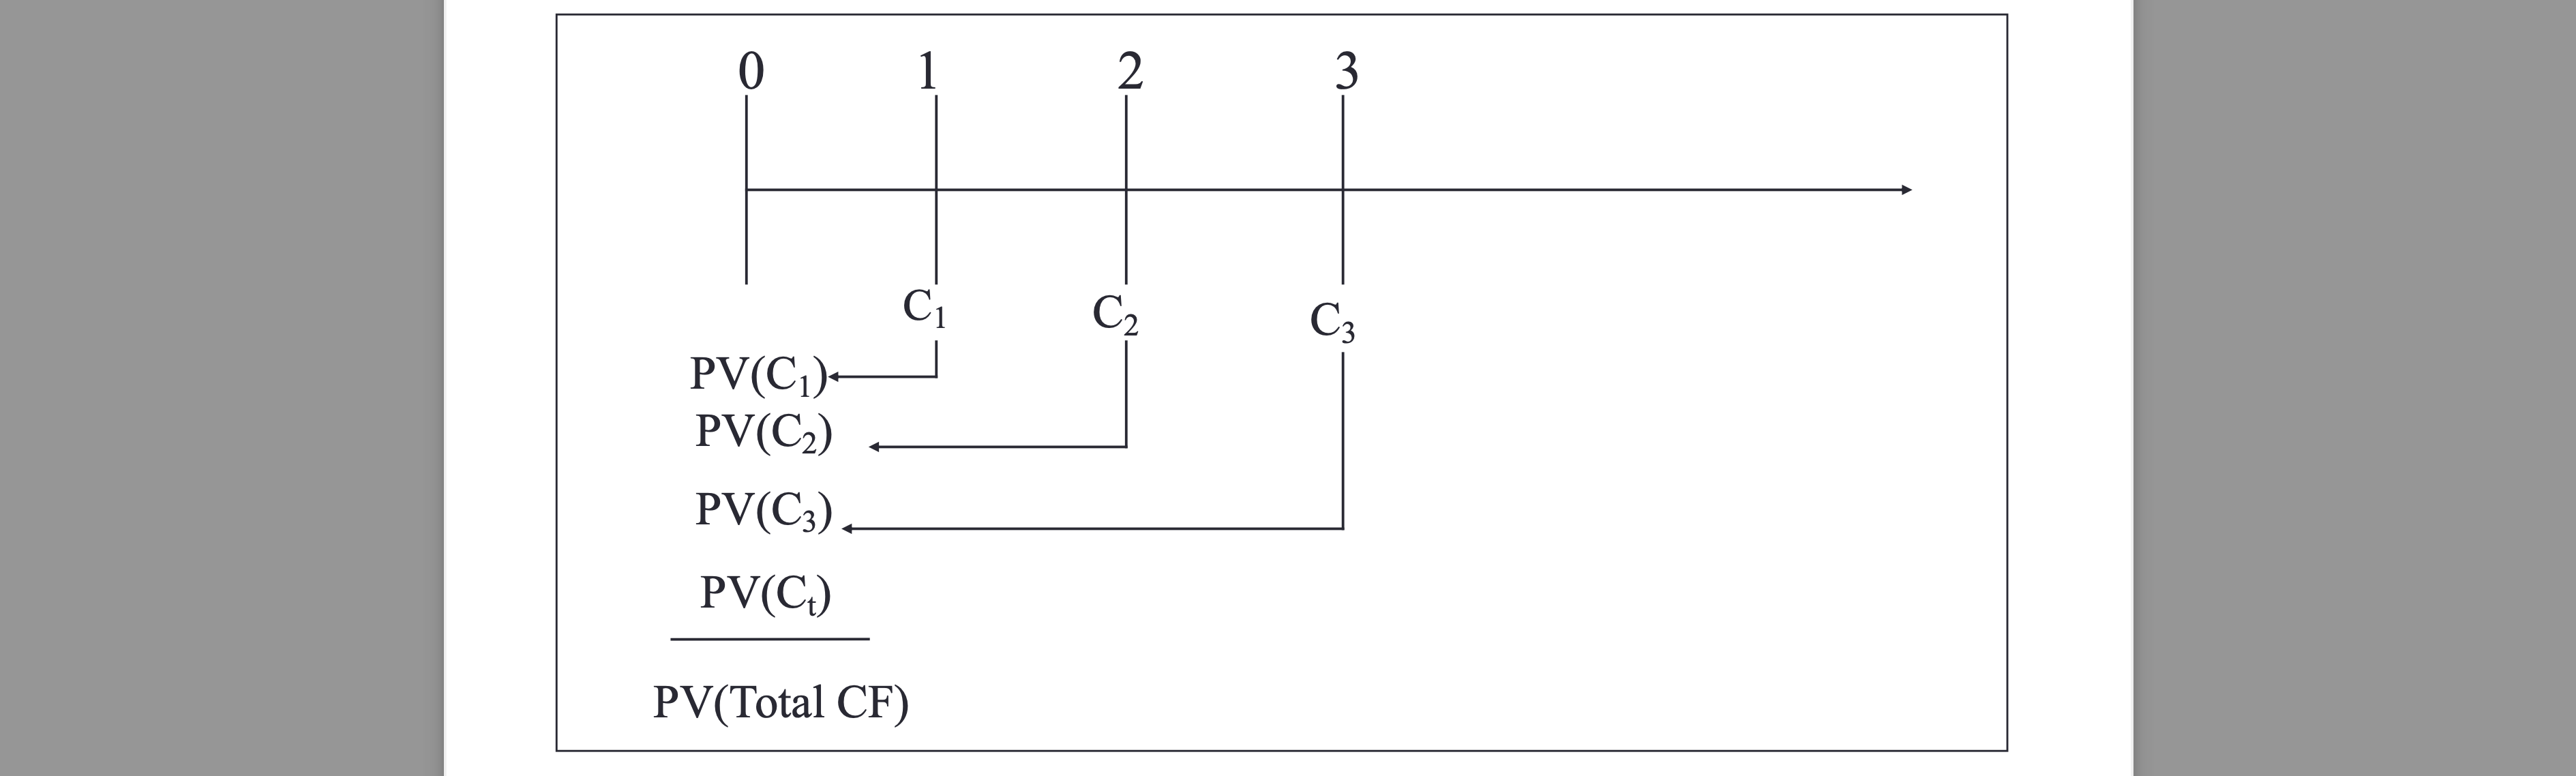

### Several special cases

* **Perpetuity**: Pays Constant Cash Flows C Forever, with the present value $PV_0 = \frac{C}{r}$. <br>
<br>
* **Annuity**: Pays Constant Cash Flow C for T periods， with the present value $PV_0 = \frac{C}{r} \times \big[ 1 - \frac{1}{(1+r)^T} \big] $. <br>
<br>
* **Growing Perpetuity**: Is a growing stream of cash flows that lasts forever. You get $C_1$ at time $1$, get $C_1 \times (1+g)$ at time $2$, ..., get $C_1 \times (1+g)^{T-1}$ at time $T$, ... forever, where $g$ is the growth rate of future cash flows. Thus, the present value is $PV_0 = \frac{C_1}{r-g}$. <br>
<br>
* **Growing Annuity**: Is a growing stream of cash flows with a fixed maturity $T$. The present value is therefore $PV_0 = \frac{C_1}{r-g} \times \big[ 1 - (\frac{1+g}{1+r})^T \big] $.

### Net Present Value (NPV)

How do you determine whether to take or reject a new investment project? We often use the **Net Present Value (NPV)** rule. Suppose that $P_0$ denotes the cost of entering this project (or equivalently, the price of buying this projecting). The NPV of the project is defined as 
$$
NPV = PV_0 - P_0,
$$
and we should take (or reject) the project if and only if its NPV is positive (or negative). 

Furthermore, if you compare two investment projects A and B, you should choose the one with positive and higher NPV (e.g., choose project A over B if $NPV_A > NPV_B$). 

### Q6.1 

You are asked to create a new class named ```DCF```. The skeleton of the codes is: 
```python
class DCF(object):
    """Abstract class for building different kinds of DCF analyses"""
    
    def __init__(self, discount_rate, num_periods, cash_flows_streams, proj_name, proj_price=None):
        """Create a new DCF analysis"""
        pass  # you need to remove this and fill in your codes
    
    def PV(self):
        """Return the present value of all future cash flows generated by this project"""
        pass  # you need to remove this and fill in your codes
    
    def NPV(self):
        """Return the net present value of all future cash flows generated by this project"""
        pass  # you need to remove this and fill in your codes

    def __lt__(self, other):
        """Returns True if self's NPV is less than other's NPV, and False otherwise"""
        pass  # you need to remove this and fill in your codes
            
    def __str__(self):
        pass  # you need to remove this and fill in your codes
```


There are several investment projects:

* **Project 1**. You are considering an investment that will pay you $\$1,000$ in one year, $\$2,000$ in two years and $\$3,000$ in three years. If you want to earn $10\%$ on your money, how much would you be willing to pay?
 * To answer this question, you will use the following codes:
```python
project1 = DCF(discount_rate=0.1, num_periods=3, cash_flows_streams=[1000,2000,3000], proj_name="project 1")
print(project1)
print("Present value of project 1:", project1.PV())
print("Net present value of project 1:", project1.NPV())
```
 * with the output: 
 
project name: project 1

discount rate: 0.1

number of periods: 3

Present value of project 1: 4815.927873779112

You forgot to put the project price

Net present value of project 1: None

In [26]:
class DCF(object):
    """Abstract class for building different kinds of DCF analyses"""
    
    def __init__(self, discount_rate, num_periods, cash_flows_streams, proj_name, proj_price=None):
        """Create a new DCF analysis"""
        self.discount_rate = discount_rate
        self.num_periods = num_periods
        self.cash_flows_streams = cash_flows_streams
        self.proj_name = proj_name
        self.proj_price = proj_price
    
    def PV(self):
        """Return the present value of all future cash flows generated by this project"""
        PV0 = 0.0
        for i in range(self.num_periods):
            PV0 = PV0 + self.cash_flows_streams[i] / (1+self.discount_rate)**(i+1)
        return PV0
    
    def NPV(self):
        """Return the net present value of all future cash flows generated by this project"""
        if self.proj_price!=None:
            return self.PV() - self.proj_price
        else:
            print("You forgot to put the project price")

    def __lt__(self, other):
        """Returns True if self's NPV is less than other's NPV, and False otherwise"""
        return self.NPV() < other.NPV()
            
    def __str__(self):
        return("project name: " + self.proj_name + "\n" +  
               "discount rate: " + str(self.discount_rate) + "\n" + 
               "number of periods: " + str(self.num_periods)) 
   

You are considering an investment that will pay you $\$1,000$ in one year, $\$2,000$ in two years and $\$3,000$ in three years. If you want to earn $10\%$ on your money, how much would you be willing to pay?

In [27]:
project1 = DCF(discount_rate=0.1, num_periods=3, cash_flows_streams=[1000,2000,3000], proj_name="project 1")
print(project1)
print("Present value of project 1:", project1.PV())
print("Net present value of project 1:", project1.NPV())

project name: project 1
discount rate: 0.1
number of periods: 3
Present value of project 1: 4815.927873779112
You forgot to put the project price
Net present value of project 1: None


* **Project 2**. Your broker calls you and tells you that he has this great investment opportunity. If you invest $\$100$ today, you will receive $\$40$ in one year and $\$75$ in two years. If you require a $15\%$ return on investments of this risk, should you take the investment?

In [28]:
project2 = DCF(discount_rate=0.15, num_periods=2, cash_flows_streams=[40, 75], 
               proj_name="project 2", proj_price=100)
print(project2)
print(project2.PV())
print(project2.NPV())

project name: project 2
discount rate: 0.15
number of periods: 2
91.49338374291116
-8.506616257088837


Suppose that there are two projects:
* Project 3. Today you need to pay $\$150$ to kick off this project. Over the next three years, you will receive $\$40$, $\$75$, and $\$100$. 
* Project 4. Today you need to pay $\$150$ to kick off this project. Over the next four years, you will receive $\$20$, $\$55$, $\$100$, and $\$100$. 

If the discount rate is $15\%$, do you prefer project 3 or 4? 

In [29]:
project3 = DCF(discount_rate=0.15, num_periods=3, cash_flows_streams=[40, 75, 100], 
               proj_name="project 3", proj_price=150)
print(project3)
print(project3.PV())
print(project3.NPV())
print("-------------------------")
project4 = DCF(discount_rate=0.15, num_periods=4, cash_flows_streams=[20, 55, 100, 100], 
               proj_name="project 4", proj_price=150)
print(project4)
print(project4.PV())
print(project4.NPV())

project name: project 3
discount rate: 0.15
number of periods: 3
157.24500698610998
7.245006986109985
-------------------------
project name: project 4
discount rate: 0.15
number of periods: 4
181.9061538516515
31.90615385165151


### Q6.2 

You are asked to build a subclass of ```DCF```, called ```Perpetuity```.  The skeleton of the codes is: 
```python
class Perpetuity(DCF):
    
    def __init__(self, discount_rate, cash_flows_constant, grow_rate, proj_name, proj_price=None):
        """Create a new DCF analysis"""
        pass  # you need to remove this and fill in your codes
    
    def PV(self):
        """Return the present value of all future cash flows generated by this project"""
        pass  # you need to remove this and fill in your codes
        
    def __str__(self):
        pass  # you need to remove this and fill in your codes
```

Question: In the 1800’s, the British government decided to consolidate all its debt and do a single issue of perpetuities (called “consols”). $2.5\%$ consols are still traded today, promising $£25$ every year. Suppose the interest rate in the UK is approximately $10\%$. What is the price of a consol promising $£25$ every year?

**If you use the following codes:**
```python
consol = Perpetuity(0.1, 25, 0, "UK consol")
print(consol)
print("Present value of consol:", consol.PV())
```

**Then you will get the following output:**

Annuity

project name: UK consol

discount rate: 0.1

Growth rate of cash flows: 0

number of periods: Infinity

Present value of consol: 250.0

In [30]:
class Perpetuity(DCF):
    
    def __init__(self, discount_rate, cash_flows_constant, grow_rate, proj_name, proj_price=None):
        """Create a new DCF analysis"""
        self.discount_rate = discount_rate
        self.cash_flows_constant = cash_flows_constant
        self.grow_rate = grow_rate
        self.proj_name = proj_name
        self.proj_price = proj_price    
    
    def PV(self):
        """Return the present value of all future cash flows generated by this project"""
        return self.cash_flows_constant / (self.discount_rate - self.grow_rate)
        
    def __str__(self):
        return("Perpetuity" + "\n" +  
               "project name: " + self.proj_name + "\n" +  
               "discount rate: " + str(self.discount_rate) + "\n" + 
               "Growth rate of cash flows: " + str(self.grow_rate) + "\n" + 
               "number of periods: Infinity") 
    

In the 1800’s, the British government decided to consolidate all its debt and do a single issue of perpetuities (called “consols”). $2.5\%$ consols are still traded today, promising $£25$ every year. Suppose the interest rate in the UK is approximately $10\%$. What is the price of a consol promising $£25$ every year?

In [31]:
consol = Perpetuity(0.1, 25, 0, "UK consol")
print(consol)
print("Present value of consol:", consol.PV())

Perpetuity
project name: UK consol
discount rate: 0.1
Growth rate of cash flows: 0
number of periods: Infinity
Present value of consol: 250.0


### Q6.3

You are asked to build a subclass of ```DCF```, called ```Annuity```.  The skeleton of the codes is: 
```python
class Annuity(DCF):
    
    def __init__(self, discount_rate, num_periods, cash_flows_constant, grow_rate, 
                 proj_name, proj_price=None):
        """Create a new DCF analysis"""
        pass  # you need to remove this and fill in your codes   
    
    def PV(self):
        """Return the present value of all future cash flows generated by this project"""
        pass  # you need to remove this and fill in your codes
    
    def __str__(self):
        pass  # you need to remove this and fill in your codes 
    
```

Question: A retirement plan offers to pay for $40$ years: The payment in year 1 equals $\$20,000$ and increases by $3\%$ each year. What is the present value at retirement if the discount rate is $10\%$?

**If you use the following codes:**
```python
retirement_plan = Annuity(0.1, 40, 20000, 0.03, "retirement plan")
print(retirement_plan)
print("Present value of the retirement plan:", retirement_plan.PV())
```

**Then you will get the following output:**

Annuity

project name: retirement plan

discount rate: 0.1

Growth rate of cash flows: 0.03

number of periods: 40

Present value of the retirement plan: 265121.5741017385

In [32]:
class Annuity(DCF):
    
    def __init__(self, discount_rate, num_periods, cash_flows_constant, grow_rate, proj_name, proj_price=None):
        """Create a new DCF analysis"""
        self.discount_rate = discount_rate
        self.num_periods = num_periods
        self.cash_flows_constant = cash_flows_constant
        self.grow_rate = grow_rate
        self.proj_name = proj_name
        self.proj_price = proj_price    
    
    def PV(self):
        """Return the present value of all future cash flows generated by this project"""
        return (self.cash_flows_constant*(1-((1+self.grow_rate)/(1+self.discount_rate))**self.num_periods) 
                / (self.discount_rate - self.grow_rate))
    
    def __str__(self):
        return("Annuity" + "\n" +  
               "project name: " + self.proj_name + "\n" +  
               "discount rate: " + str(self.discount_rate) + "\n" + 
               "Growth rate of cash flows: " + str(self.grow_rate) + "\n" + 
               "number of periods: " + str(self.num_periods)) 
    

A retirement plan offers to pay for $40$ years: The payment in year 1 equals $\$20,000$ and increases by $3\%$ each year. What is the present value at retirement if the discount rate is $10\%$?

In [33]:
retirement_plan = Annuity(0.1, 40, 20000, 0.03, "retirement plan")
print(retirement_plan)
print("Present value of the retirement plan:", retirement_plan.PV())

Annuity
project name: retirement plan
discount rate: 0.1
Growth rate of cash flows: 0.03
number of periods: 40
Present value of the retirement plan: 265121.5741017385


---

# END